<h1> 10. Bioequivalence Clinical Trials

<h1> 10.1 임상시험 데이터

<h2> 10.1.1 Chow and Liu (2009) 데이터


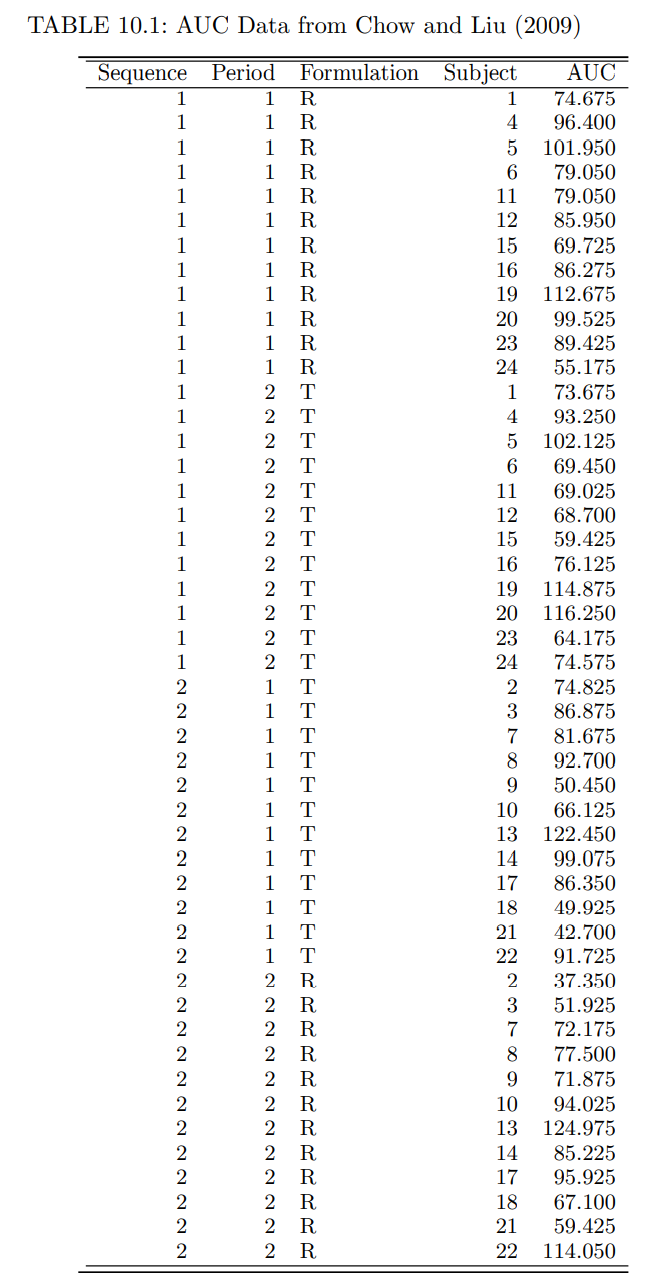

<h2> 10.1.2 시메티딘 데이터

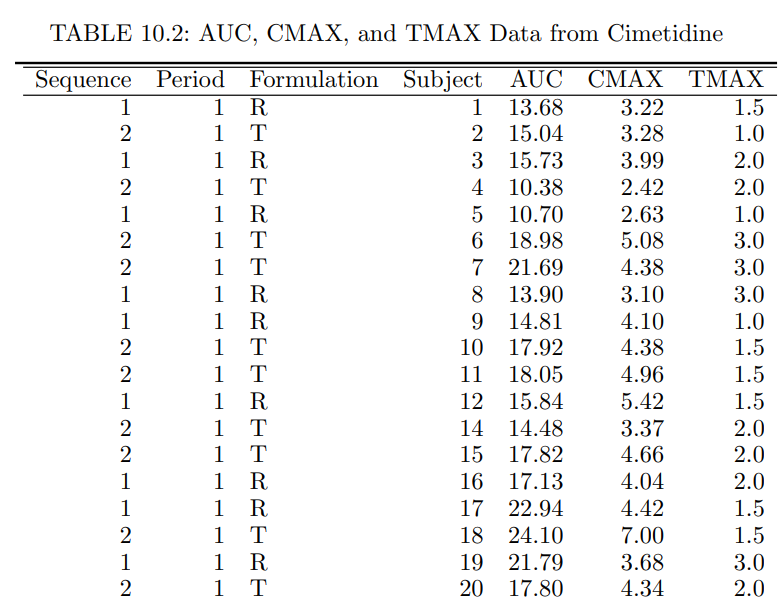

<h1> 10.2 생동등성 시험 종말점

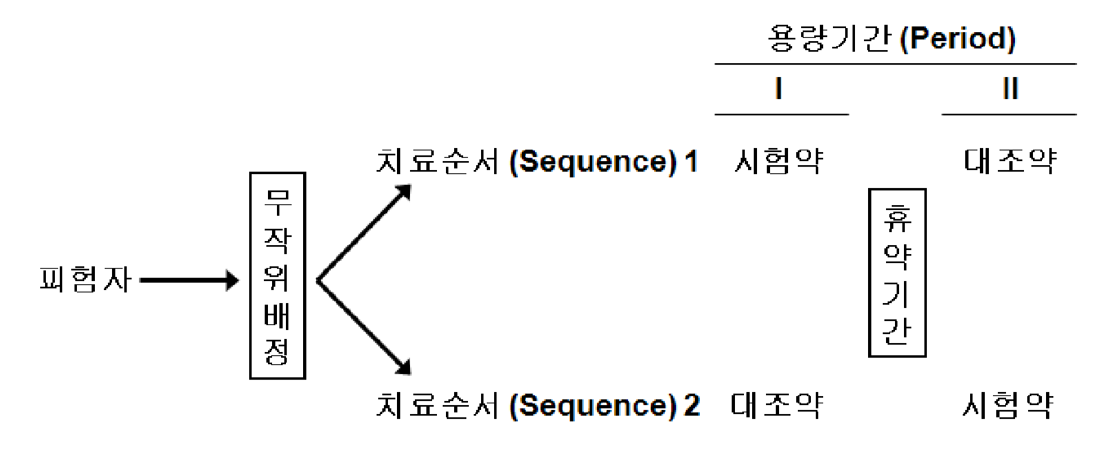
* 생동등성 시험 : 새로운 약물(test, 제네릭)의 약물동태가 오리지널 약물(reference)과 동일한지 검증하는 시험

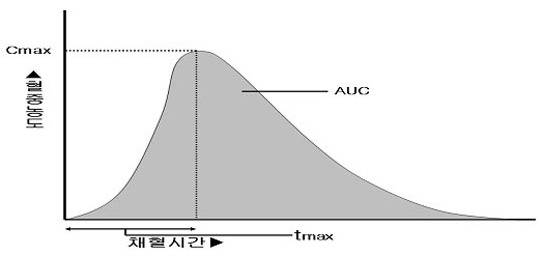

* AUC : 시간에 따른 곡선(혈중농도)의 적분
* CMAX : 곡선의 가장 높은 값(최대 농도)
* TMAX : CMAX에서의 시간

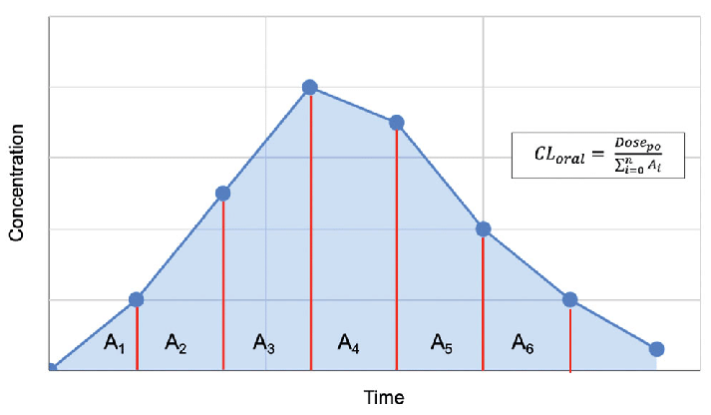

$$ AUC = \sum_{\tau = 1}^k  \frac{(c_{\tau}+c_{\tau-1}) \times (t_{\tau}-t_{\tau-1})}{2}$$
$$ CMAX=max(c_0, c_1, ... , c_k) $$
$$ \beta_t = 종말 제거율$$
$$ t_\frac{1} {2}= - \frac{ln(2)}{\beta_t}$$
$$ AUC_{0-\infty} = AUC_{0-k} + \frac {c_k}{\beta_t}$$


<h1> 10.3 생동등성 분석에 쓰이는 통계학적 방법 

<h2> 10.3.1 신뢰구간(CI) 결정

* T: test formulation /  R: reference formulation
* $$CMAX , AUC_{0-t} , AUC_{0-\infty}  에 대하여 $$

$$ R=\frac{\mu_T} {\mu_R} \to 90\%CI = (R_L, R_U ) \in DecisionCI_{ratio} =(80\%; 125\%)  $$

$$ M={\mu_T} - {\mu_R} \to 90\%CI = (M_L, M_U ) \in DecisionCI_{ratio} =(-0.2 \times \mu_R, 0.25 \times \mu_R)  $$

<h2> 10.3.2 고전적 비대칭 신뢰구간(CI)

* t검정을 이용

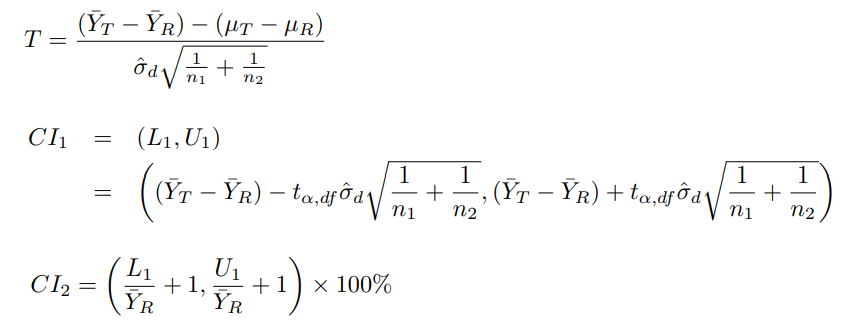

<h2> 10.3.3 Westlake 대칭 신뢰구간(CI)

* CI1을 0을 중심으로 대칭적으로 조정
* CI2를 1로 조정

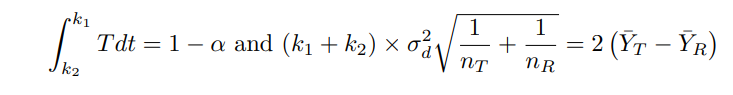

<h2> 10.3.4 2개의 단측검정

* 귀무가설 : bioinequivalence , 대립가설 : bioequivance
* H01, H02 2개의 귀무가설이 모두 기각될 때 생동등성을 받아들임
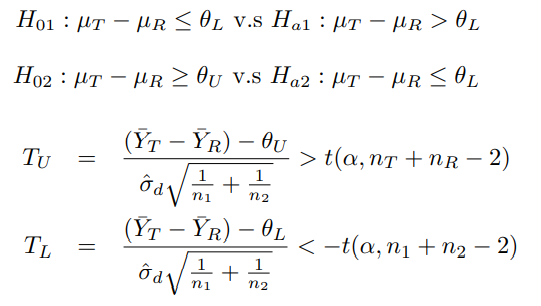

<h2> 10.3.5 베이지안 접근법   

* pRD가 90% 이상이면 생동등성을 받아들임
* 결국 고전적인 CI1과 동일함
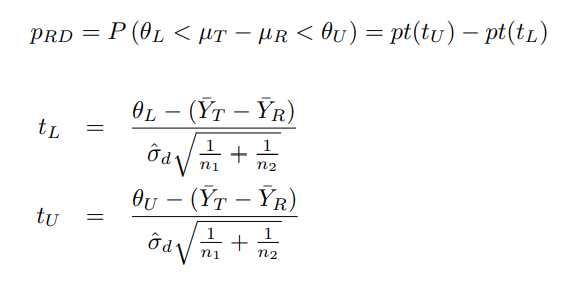

<h2> 10.3.6 Bienayme_Tchebycheff(BT) 부등식 CI

* 90% 확률을 기준으로 계산하면 K= 3.1623

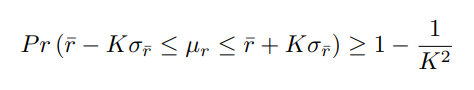

<h2> 10.3.7 붓스트랩 CI   

* 샘플에서 1000개 이상 재표집
* 90% 신뢰구간의(5~95%)의 데이터가 DecisionCIratio(80%;125%) 내에 있는지 확인

<h1> 10.4 Step-by-Step Implementation in R

<h2> 10.4.1 Chow and Liu (2009) 데이터 분석

10.4.1.1 데이터 불러오기

In [4]:
setwd("d:/ch10/")
getwd()

dat = read.csv("ChowLiuTab361.csv", header=T)
head(dat)

[1] "d:/ch10"

Sequence,Period,Formulation,Subject,AUC
1,1,R,1,74.675
1,1,R,4,96.400
1,1,R,5,101.950
1,1,R,6,79.050
1,1,R,11,79.050
1,1,R,12,85.950


In [5]:
tab.n = aggregate(dat$AUC,list(seq=dat$Sequence, prd=dat$Period),length)
tab.n
n1 = tab.n[tab.n$seq==1 & tab.n$prd==1,]$x
n2 = tab.n[tab.n$seq==2 & tab.n$prd==1,]$x
n = n1+n2
n

seq,prd,x
1,1,12
2,1,12
1,2,12
2,2,12


[1] 24

In [6]:
tab.mean = aggregate(dat$AUC,list(seq=dat$Sequence, prd=dat$Period),mean)
tab.var = aggregate(dat$AUC,list(seq=dat$Sequence, prd=dat$Period),var)
tab.mean
summaryTab = data.frame(Sequence=tab.mean$seq,Period=tab.mean$prd, numSample = tab.n$x,Mean = tab.mean$x, Var=tab.var$x)
round(summaryTab,2)


seq,prd,x
1,1,85.82292
2,1,78.73958
1,2,81.80417
2,2,79.29583


Sequence,Period,numSample,Mean,Var
1,1,12,85.82,246.22
2,1,12,78.74,538.57
1,2,12,81.80,388.55
2,2,12,79.30,634.93


10.4.1.2 잔류효과 테스트
$$U_{ik} = Y_{i1k} + Y_{i2k}$$   $$    i=1,2,..., n_{k};   k=1, 2$$

In [7]:
Uik = aggregate(dat$AUC,list(seq = dat$Sequence,sub=dat$Subject), sum)
colnames(Uik) = c("seq", "sub","Uik")
Uik

seq,sub,Uik
1,1,148.350
2,2,112.175
2,3,138.800
1,4,189.650
1,5,204.075
1,6,148.500
2,7,153.850
2,8,170.200
2,9,122.325
2,10,160.150


$$\bar{U_{.k}} = \frac{1}{n_k} \sum_{i=1}^{n_{k}}U_{ik}$$  $$  k=1,2           $$

In [11]:
mUk = aggregate(Uik$Uik, list(seq=Uik$seq), mean)
colnames(mUk) = c("seq", "mUk")
print(mUk)
hatC = mUk[2,2]-mUk[1,2]
hatC


  seq      mUk
1   1 167.6271
2   2 158.0354


[1] -9.591667

$$ \hat{Var}(\hat{C})=\hat{\sigma}_{u}^2(\frac{1}{n_1} + \frac{1}{n_2})  $$
$$ \hat{\sigma}_{u}^{2} = \frac{1}{n_1 + n_2 -2} \ \sum_{k=1}^2 \sum_{i=1}^{n_k} ( U_{ik} - \bar{U}_{.k})^2  $$

In [9]:
dU = merge(Uik, mUk)
dU
sigu2 = sum((dU$Uik-dU$mUk)^2)/(n1+n2-2)
sigu2

seq,sub,Uik,mUk
1,1,148.350,167.6271
1,6,148.500,167.6271
1,11,148.075,167.6271
1,4,189.650,167.6271
1,5,204.075,167.6271
1,15,129.150,167.6271
1,12,154.650,167.6271
1,19,227.550,167.6271
1,16,162.400,167.6271
1,23,153.600,167.6271


[1] 1473.772

$$ T_{C} = \frac{\hat{C}}{\sqrt{\hat{\sigma}_{u}^2(\frac{1}{n_1} + \frac{1}{n_2})}}  $$

In [12]:
se.sigu = sqrt(sigu2*(1/n1+1/n2))
TC = hatC/se.sigu
TC
pC = 2*(1-pt(abs(TC), n1+n2-2))
pC

[1] -0.6120045

[1] 0.5468084

10.4.1.3. 직접적 제형효과 테스트

$$ d_{ik} = \frac{1} {2} ( Y_{i2k}-Y_{i1k})     $$

In [13]:
dik = aggregate(dat$AUC, list(sub=dat$Subject,seq=dat$Sequence), diff)
dik$x = dik$x/2
colnames(dik)= c("sub", "seq","dik")
dik

sub,seq,dik
1,1,-0.5000
4,1,-1.5750
5,1,0.0875
6,1,-4.8000
11,1,-5.0125
12,1,-8.6250
15,1,-5.1500
16,1,-5.0750
19,1,1.1000
20,1,8.3625


$$ \hat{F} = \bar{d}_{.1} - \bar{d} _{.2}    $$

In [14]:
mdk = aggregate(dik$dik, list(seq=dik$seq), mean)
colnames(mdk) = c("seq", "mdk")
mdk
hatF = mdk[1,2]-mdk[2,2]
hatF

seq,mdk
1,-2.009375
2,0.278125


[1] -2.2875

$$ \hat{Var}(\hat{F})=\hat{\sigma}_{d}^2(\frac{1}{n_1} + \frac{1}{n_2})  $$
$$ \hat{\sigma}_{d}^{2} = \frac{1}{n_1 + n_2 -2} \ \sum_{k=1}^2 \sum_{i=1}^{n_k} ( d_{ik} - \bar{d}_{.k})^2  $$

In [15]:
dF = merge(dik, mdk)
sigd2 = sum((dF$dik-dF$mdk)^2)/(n1+n2-2)
sigd2

[1] 83.6234

$$ T_{F} = \frac{\hat{F}}{\sqrt{\hat{\sigma}_{d}^2(\frac{1}{n_1} + \frac{1}{n_2})}}  $$

In [17]:
se.sigd = sqrt(sigd2*(1/n1+1/n2))
TF = hatF/se.sigd
TF
pF = 2*(1-pt(abs(TF), n1+n2-2))
pF

[1] -0.6127352

[1] 0.5463338

10.4.1.4 분산분석
* 이원반복측정 분산분석

In [18]:
Data = data.frame(subj = as.factor(dat$Subject),formu = as.factor(dat$Formulation),seq = as.factor(dat$Sequence),prd = as.factor(dat$Period),AUC = dat$AUC)
head(Data)
summary(aov(AUC ~ seq*formu + Error(subj), data = Data))

subj,formu,seq,prd,AUC
1,R,1,1,74.675
4,R,1,1,96.400
5,R,1,1,101.950
6,R,1,1,79.050
11,R,1,1,79.050
12,R,1,1,85.950



Error: subj
          Df Sum Sq Mean Sq F value Pr(>F)
seq        1    276   276.0   0.375  0.547
Residuals 22  16211   736.9               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
formu      1     63   62.79   0.375  0.546
seq:formu  1     36   35.97   0.215  0.647
Residuals 22   3679  167.25               

* t-test로 검정한 결과와 분산분석으로 검증한 결과가 일치함
* 잔류, 측정 시기(period) 제형(T, R)효과는 동일한 것으로 나타남

10.4.1.5 CI 결정

In [19]:
mformu = tapply(dat$AUC, list(formu=dat$Formulation), mean)
mformu
ybarT = mformu["T"]
ybarR = mformu["R"]
dec2.low = theta.L = -0.2*ybarR
dec2.up = theta.U = 0.25*ybarR
cat("DecisionCI.mean=(",dec2.low,",",dec2.up,")",sep="","\n")


formu
       R        T 
82.55938 80.27187

DecisionCI.mean=(-16.51187,20.63984)


10.4.1.6 고전적 90% CI 검정

In [20]:
alphaCI = .1
qt.alpha = qt(1-alphaCI, n1+n2-2)
qt.alpha

[1] 1.321237

In [21]:
low1 = (ybarT-ybarR)-qt.alpha*sqrt(sigd2)*sqrt(1/n1+1/n2)
up1 = (ybarT-ybarR)+qt.alpha*sqrt(sigd2)*sqrt(1/n1+1/n2)
cat("The classical CI1=(", round(low1,3),",",round(up1,3),")", sep=" ","\n\n")

The classical CI1=( -7.22 , 2.645 ) 



In [22]:
low2 = (low1/ybarR+1)*100
up2 = (up1/ybarR+1)*100
cat("The Ratio CI2=(", round(low2,3),",",round(up2,3),")", sep=" ","\n\n")

The Ratio CI2=( 91.255 , 103.204 ) 



10.4.1.7 Westlake CI

In [24]:
k12 = 2*(ybarR-ybarT)/sqrt( sigd2*(1/n1+1/n2))
k12
k2 = uniroot(function(k2) pt(k12-k2,n1+n2-2)- pt(k2,n1+n2-2)-(1-alphaCI),lower = -10, upper = 10, tol = 0.0001)$root
k1 =k12-k2
k1
cat("The Westlake k1=",k1," and k2=",k2,sep=" ", "\n\n")

low.west = k2*sqrt(sigd2*(1/n1+1/n2))-(ybarR-ybarT)
up.west = k1*sqrt(sigd2*(1/n1+1/n2))-(ybarR-ybarT)

low.west
up.west

R 
1.22547

R 
2.598443

The Westlake k1= 2.598443  and k2= -1.372973 



R 
-7.413166

R 
7.413166

10.4.1.8 2개의 단측검정

In [25]:
TL = (ybarT-ybarR-theta.L)/sqrt(sigd2*(1/n1+1/n2))
TU = (ybarT-ybarR-theta.U)/sqrt(sigd2*(1/n1+1/n2))
TL
TU

T 
3.810175

T 
-6.141373

In [26]:
pL = 1-pt(abs(TL), n1+n2-2); pU = pt(TU,n1+n2-2)
pL
pU
p1side = max(pL, pU)
p1side

T 
0.0004785782

T 
1.754433e-06

[1] 0.0004785782

10.4.1.9 베이지안 접근법

In [27]:
tL = (theta.L -(ybarT-ybarR))/sqrt(sigd2*(1/n1+1/n2))
tU = (theta.U -(ybarT-ybarR))/sqrt(sigd2*(1/n1+1/n2))
pRD = pt(tU, n1+n2-2) - pt(tL, n1+n2-2);
pRD


R 
0.9995197

0.9995> 90% 이므로 생동등성을 받아들임

10.4.1.10 Individual-Based BT CI

In [28]:
dR = dat[dat$Formulation=="R",c("Subject","AUC")]
dR
dT = dat[dat$Formulation=="T",c("Subject","AUC")]
dT
colnames(dR) = c("Subject","AUC4R")
colnames(dT) = c("Subject","AUC4T")
dR
dRT = merge(dR,dT)
dRT
rT2R = dRT$AUC4T/dRT$AUC4R 
rT2R

,Subject,AUC
1,1,74.675
2,4,96.400
3,5,101.950
4,6,79.050
5,11,79.050
6,12,85.950
7,15,69.725
8,16,86.275
9,19,112.675
10,20,99.525


,Subject,AUC
13,1,73.675
14,4,93.250
15,5,102.125
16,6,69.450
17,11,69.025
18,12,68.700
19,15,59.425
20,16,76.125
21,19,114.875
22,20,116.250


,Subject,AUC4R
1,1,74.675
2,4,96.400
3,5,101.950
4,6,79.050
5,11,79.050
6,12,85.950
7,15,69.725
8,16,86.275
9,19,112.675
10,20,99.525


Subject,AUC4R,AUC4T
1,74.675,73.675
2,37.350,74.825
3,51.925,86.875
4,96.400,93.250
5,101.950,102.125
6,79.050,69.450
7,72.175,81.675
8,77.500,92.700
9,71.875,50.450
10,94.025,66.125


[1] 0.9866086 2.0033467 1.6730862 0.9673237 1.0017165 0.8785579 1.1316245
 [8] 1.1961290 0.7019130 0.7032704 0.8731815 0.7993019 0.9797960 1.1625110
[15] 0.8522768 0.8823529 0.9001824 0.7440387 1.0195252 1.1680482 0.7185528
[22] 0.8042525 0.7176405 1.3516085

In [29]:
k = 1/sqrt(1-.9)
k
rbar = mean(rT2R)
sigrbar = sqrt(var(rT2R)/n) 
rbar
sigrbar

[1] 3.162278

[1] 1.009035

[1] 0.0638487

In [30]:
low.BT = rbar-k*sigrbar; up.BT = rbar+k*sigrbar
low.BT
up.BT

[1] 0.8071279

[1] 1.210943

DecisionCI ratio인 (80%, 125%) 사이에 있으므로 생물학적 동등함을 받아들임

10.4.1.11 붓스트랩 CI

In [31]:
# B=number of bootstrap
B = 2000
# boota and bootb to keep track the bootstrap results
boota = bootb = NULL
for(b in 1:B){
  # Bootstrap the observed individual ratios
  boota[b] = mean(sample(rT2R, replace=T))
  # bootstrap the individuals and calculate the means
  tmp = dRT[sample(1:n, replace=T),]
  bootb[b] = mean(tmp$AUC4T)/mean(tmp$AUC4R)
}


In [32]:
qxa = quantile(boota, c(0.05, 0.95)) 
qxa

qxb = quantile(bootb, c(0.05, 0.95))
qxb

5%       95% 
0.9140492 1.1158538

5%       95% 
0.9093517 1.0470658

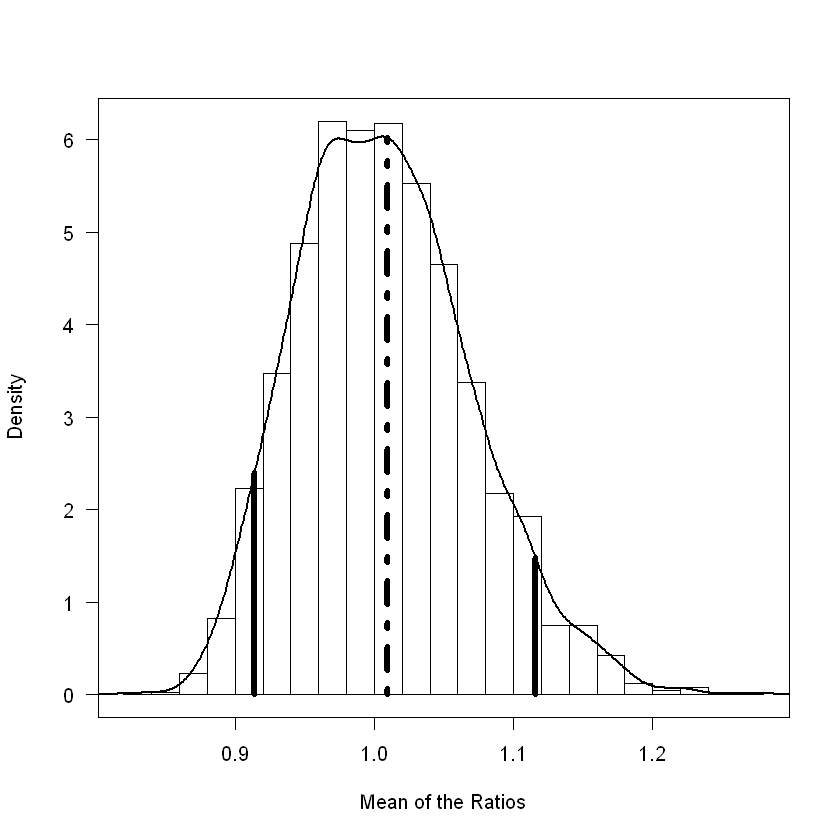

In [33]:
# R code for Figurwe 10.1
hist(boota,nclass=30, freq=F,las=1, xlab="Mean of the Ratios", ylab="Density", main="")
box()
den = density(boota)
lines(den, lwd=2)
qya = approx(den$x, den$y, c(qxa,rbar))$y
segments(qxa[1],0,qxa[1],qya[1], lwd=5)
segments(qxa[2],0,qxa[2],qya[2], lwd=5)
segments(rbar,0,rbar,qya[3],lty=4, lwd=5)


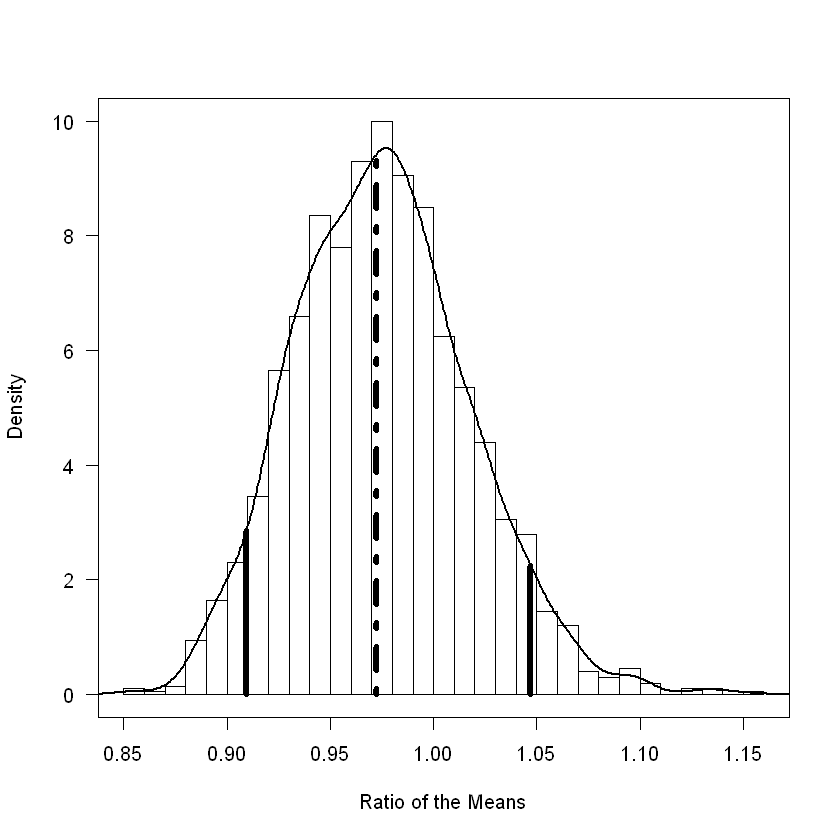

In [37]:
# R code for Figure 10.2:
hist(bootb,nclass=30, freq=F,las=1,xlab="Ratio of the Means", ylab="Density", main="")
box()
den = density(bootb)
lines(den, lwd=2)
rmean = mean(dRT$AUC4T)/mean(dRT$AUC4R)
qyb = approx(den$x, den$y, c(qxb,rmean))$y
segments(qxb[1],0,qxb[1],qyb[1], lwd=5)
segments(qxb[2],0,qxb[2],qyb[2], lwd=5)
segments(rmean,0,rmean,qyb[3],lty=4, lwd=5)



	Shapiro-Wilk normality test

data:  bootb
W = 0.99335, p-value = 7.476e-08


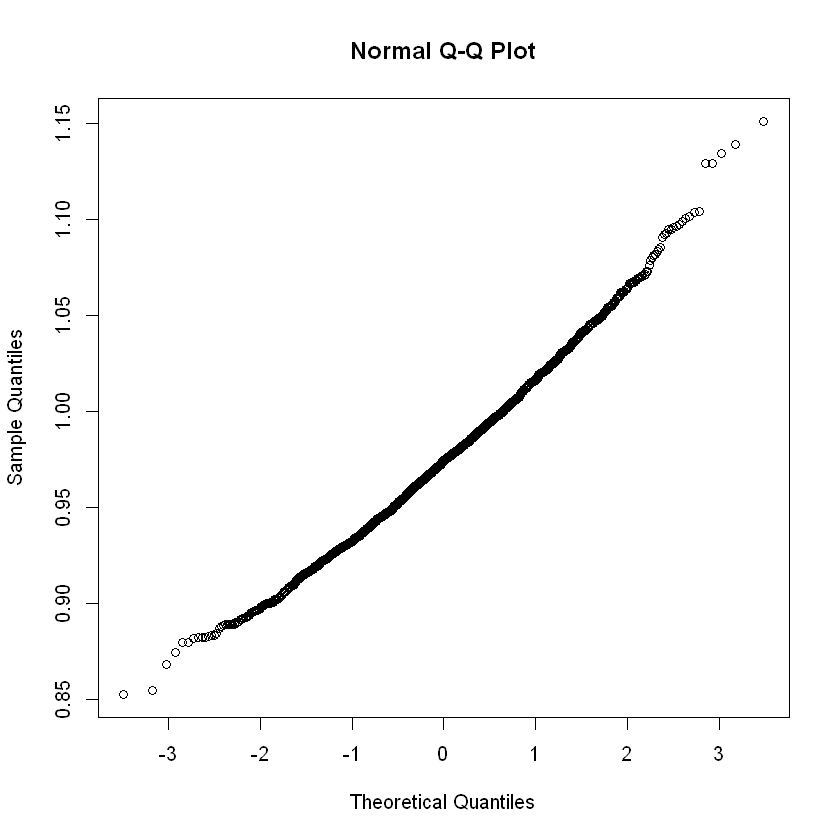

In [38]:
shapiro.test(bootb)
qqnorm(bootb)

<h2> 10.4.2 시메티딘 데이터 분석

10.4.2.1 임상시험 Endpoints 계산

In [39]:
datRaw0 = read.csv("CimetidineRaw.csv", header=T)
print(datRaw0)

   Subject  HR0 HR05 HR10 HR15 HR20 HR30 HR40 HR60 HR80 HR100 HR120 HR180 HR240
1        1 0.00 2.81 2.39 2.96 4.08 2.72 1.88 0.94 0.56  0.28  0.00     0     0
2        3 0.00 0.25 2.25 2.64 4.18 3.97 2.25 0.94 0.41  0.15  0.10     0     0
3        5 0.00 1.80 3.16 3.49 2.85 2.71 1.52 0.75 0.39  0.22  0.00     0     0
4        8 0.10 4.62 4.06 3.31 3.88 3.19 1.73 0.94 0.53  0.23  0.11     0     0
5        9 0.11 1.72 1.67 2.45 2.63 4.60 2.00 0.69 0.26  0.19  0.00     0     0
6       12 0.00 1.48 1.82 1.84 2.88 2.12 1.22 0.58 0.40  0.20  0.00     0     0
7       16 0.00 1.02 1.68 2.95 3.30 4.06 2.17 1.11 0.57  0.33  0.14     0     0
8       17 0.00 2.48 4.02 3.98 5.46 4.80 3.20 1.39 0.58  0.27  0.15     0     0
9       19 0.00 1.12 1.65 1.57 1.71 4.44 3.06 1.33 0.59  0.28  0.17     0     0
10      22 0.00 0.21 1.91 1.11 1.64 2.46 1.55 0.75 0.41  0.18  0.00     0     0
11      23 0.00 0.81 2.32 2.19 2.16 1.24 0.94 0.51 0.35  0.23  0.14     0     0


In [40]:
datRaw = reshape(datRaw0, direction="long", varying=-1,idvar = "Subject",sep="")
datRaw$time = datRaw$time/10
colnames(datRaw) = c("subj","time","conc")
head(datRaw)

,subj,time,conc
1.0,1,0,0.00
3.0,3,0,0.00
5.0,5,0,0.00
8.0,8,0,0.10
9.0,9,0,0.11
12.0,12,0,0.00


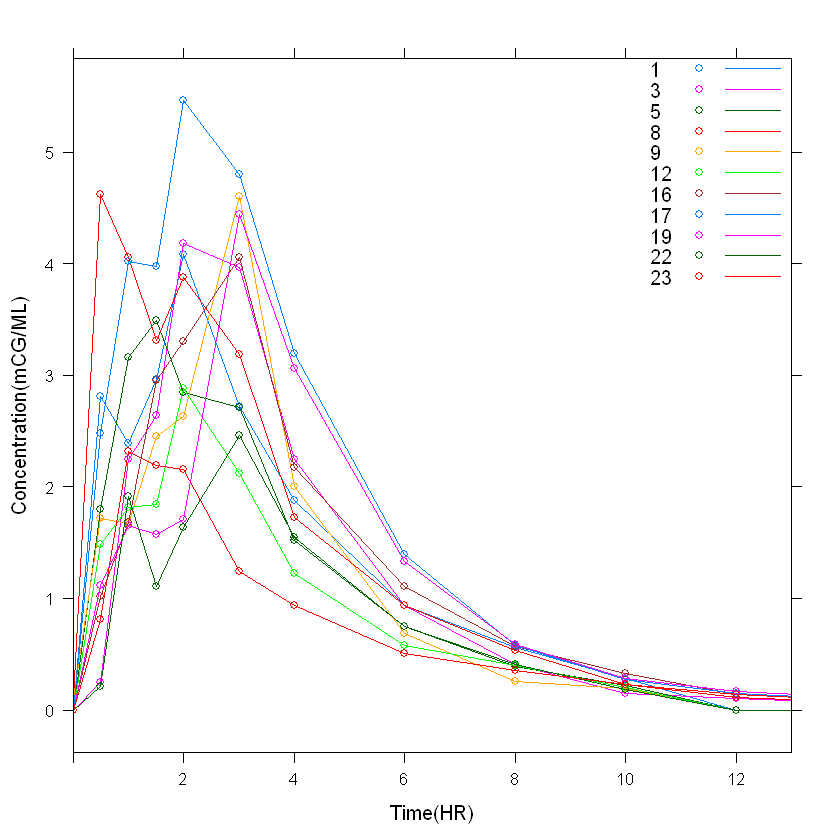

In [41]:
library(lattice)

print(xyplot(conc~time,group=subj,datRaw,xlab="Time(HR)",
             xlim=c(0,13),auto.key = list(corner=c(1,1),lines = TRUE) ,
             ylab="Concentration(mCG/ML)",type=c("p","a")))

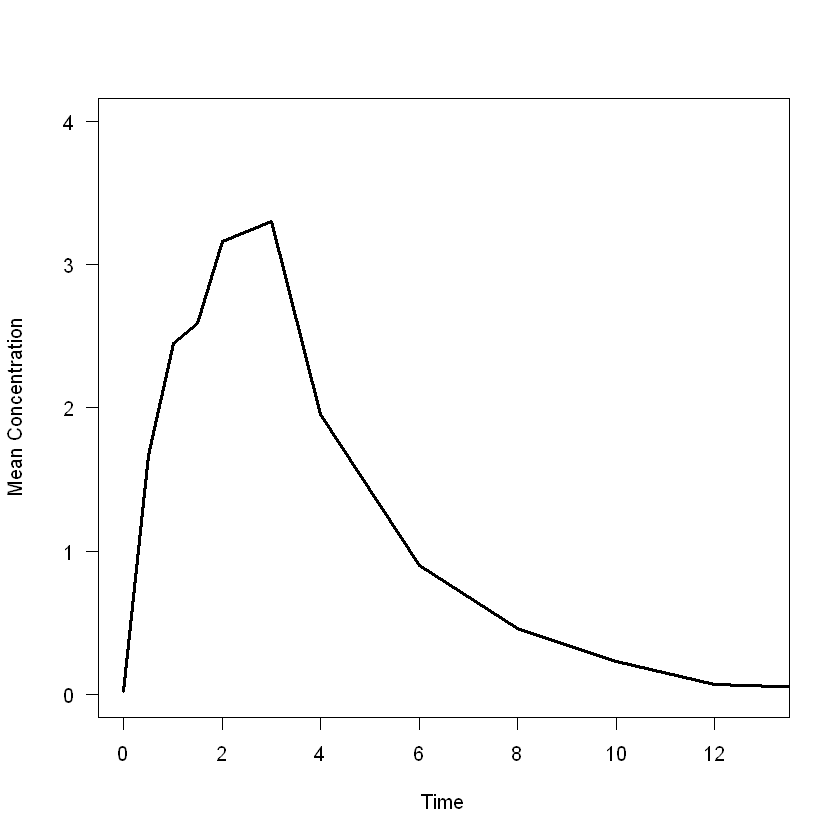

In [42]:
# make the mean concentration
dat.mean= aggregate(datRaw$conc, list(time=datRaw$time), mean)
# plot it with a line
plot(conc~time,las=1,type="n",datRaw,xlab="Time",xlim=c(0,13), ylim=c(0, 4), ylab="Mean Concentration")
lines(x~time,dat.mean, lty=1, lwd=3)

In [43]:
# function `make.beta' with argument `dt'
make.beta = function(dt){
  # terminal elimination beta to find the slope for R2(k+1) <R2(k)
  n = length(dt$conc) # get the length of data
  # end the loop at tmax
  tmax = which.max(dt$conc)
  # loop over starting from the last time-conc point to tmax
  
  for(k in n:tmax){
    dt1 = dt[((k-2):n),] # start with last 3 pts and move on
    dt2 = dt[((k-3):n),] # start with last 4 pts and move on
    # some date have 0s at the end of t-c curve and make the lm crash
    # so make this dataframe at least 3 data points
    if( dim(dt1[dt1$conc>0,])[1]>= 3 ){
      # fit log(conc) to time and track the r-square
      m1 = lm(log(conc)~time, dt1[(dt1$conc>0),])
      m2 = lm(log(conc)~time, dt2[(dt2$conc>0),])
      betat = m1$coef[[2]]
      #cat("Check=",summary(m1)$r.squared > summary(m2)$r.squared,"
      #and Stopped at", k, "with beta=",betat,sep=" ","\n\n")
      if(summary(m1)$r.squared > summary(m2)$r.squared) break
    } # end of if-loop
  } # end of k-for-loop
  #cat("final beta=",betat,"\n\n")
  # return
  betat
} # end of make-beta function


In [44]:
make = function(dt){
  time = dt$time; conc = dt$conc
  # calculate AUC
  t.dif = diff(time) # the t(i)-t(i-1)
  c.mean = (conc[-1]+conc[-length(conc)])/2
  auc = sum(t.dif*c.mean)
  # Cmax
  cmax = max(conc)
  # tmax
  tmax = dt[which.max(dt$conc),]$time
  # terminal elimination beta to find the slope for R2(k+1) <R2(k)
  betat = make.beta(dt)
  # terminal halflife
  t5 = round(-log(2)/betat*2.303,1)
  # AUC infinite
  aucinf = auc+ conc[length(conc)]/betat
  # return the results.
  c(auc,cmax,tmax, betat, t5, aucinf)
}

In [45]:
name.subj = sort(unique(datRaw$subj))

num.subj = length(name.subj)
endpts = matrix(0, nrow=num.subj, ncol=7)
colnames(endpts) = c("subj","AUC","CMAX","TMAX",
                       "betat","t5","AUCinf")
for(id in 1:num.subj){
   tmp = datRaw[(datRaw$subj == name.subj[id]),
               c("time","conc")]
  endpts[id,] = c(name.subj[id],make(tmp))
}
endpts

subj,AUC,CMAX,TMAX,betat,t5,AUCinf
1,16.2400,4.08,2.0,-0.3188838,5.0,16.2400
3,16.4500,4.18,2.0,-0.4189800,3.8,16.4500
5,14.0725,3.49,1.5,-0.3066114,5.2,14.0725
8,18.5550,4.62,0.5,-0.3930992,4.1,18.5550
9,14.8000,4.60,3.0,-0.4594391,3.5,14.8000
12,11.0400,2.88,2.0,-0.2898215,5.5,11.0400
16,17.1950,4.06,3.0,-0.3347351,4.8,17.1950
17,24.0150,5.46,2.0,-0.3380982,4.7,24.0150
19,17.5625,4.44,3.0,-0.3730899,4.3,17.5625
22,10.3100,2.46,3.0,-0.3630564,4.4,10.3100


10.4.2.2 ANOVA: 잔류효과와 다른 효과 검증

In [46]:
dat = read.csv("Cimetidine.csv", header=T)

Data = data.frame(subj = as.factor(dat$Subject),
                    formu = as.factor(dat$Formulation),
                    seq = as.factor(dat$Sequence),
                    prd = as.factor(dat$Period),
                    AUC = dat$AUC, lAUC= log(dat$AUC),
                    CMAX = dat$CMAX, lCMAX= log(dat$CMAX))

nsubj = tapply(dat$Subject, list(dat$Sequence), length)/2
n1 = nsubj[1]
n2 = nsubj[2]
n = n1+n2

In [47]:
Data
nsubj 

subj,formu,seq,prd,AUC,lAUC,CMAX,lCMAX
1,R,1,1,13.68,2.615935,3.22,1.1693814
2,T,2,1,15.04,2.710713,3.28,1.1878434
3,R,1,1,15.73,2.755570,3.99,1.3837912
4,T,2,1,10.38,2.339881,2.42,0.8837675
5,R,1,1,10.70,2.370244,2.63,0.9669838
6,T,2,1,18.98,2.943386,5.08,1.6253113
7,T,2,1,21.69,3.076851,4.38,1.4770487
8,R,1,1,13.90,2.631889,3.10,1.1314021
9,R,1,1,14.81,2.695303,4.10,1.4109870
10,T,2,1,17.92,2.885917,4.38,1.4770487


1  2 
11 12

* AUC에 대한 ANOVA

In [48]:
# the fixed model using lm for "formulation" and "period"
mdAUC = lm(AUC ~ seq + subj:seq + prd + formu,data = Data)
print(anova(mdAUC))

Analysis of Variance Table

Response: AUC
          Df Sum Sq Mean Sq F value    Pr(>F)    
seq        1  34.09  34.094  9.6224  0.005398 ** 
prd        1   0.94   0.936  0.2640  0.612726    
formu      1   0.27   0.268  0.0755  0.786138    
seq:subj  21 525.18  25.009  7.0584 1.765e-05 ***
Residuals 21  74.41   3.543                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [49]:
# the random effect model using aov for carryover
# and other effects
mdAUC.R = aov(AUC ~ prd * formu + Error(subj),
data = Data)
print(summary(mdAUC.R))


Error: subj
          Df Sum Sq Mean Sq F value Pr(>F)
prd:formu  1   34.1   34.09   1.363  0.256
Residuals 21  525.2   25.01               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
prd        1   0.94   0.936   0.264  0.613
formu      1   0.27   0.268   0.076  0.786
Residuals 21  74.41   3.543               


 * 잔류효과(carryover effect)는 p=.0256으로 없는 것으로 나타남
 * period나 formu도 각각 p=0.786, 0.613으로 유의하지 않는 것으로 나타남

* log AUC에 대한 ANOVA

In [50]:
# the fixed effects model using lm for "formulation"
# and "period"
mdlAUC = lm(lAUC ~ seq + subj:seq + prd + formu,data = Data)
print(anova(mdlAUC))

Analysis of Variance Table

Response: lAUC
          Df  Sum Sq  Mean Sq F value    Pr(>F)    
seq        1 0.14533 0.145335  8.0484 0.0098747 ** 
prd        1 0.00479 0.004790  0.2653 0.6118936    
formu      1 0.00332 0.003322  0.1840 0.6723624    
seq:subj  21 1.92446 0.091641  5.0749 0.0002299 ***
Residuals 21 0.37921 0.018058                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [51]:
# the random effect model using aov for carryover and
# other effects
mdlAUC.R = aov(lAUC~prd*formu+Error(subj),data=Data)
print(summary(mdlAUC.R))



Error: subj
          Df Sum Sq Mean Sq F value Pr(>F)
prd:formu  1 0.1453 0.14533   1.586  0.222
Residuals 21 1.9245 0.09164               

Error: Within
          Df Sum Sq  Mean Sq F value Pr(>F)
prd        1 0.0048 0.004790   0.265  0.612
formu      1 0.0033 0.003322   0.184  0.672
Residuals 21 0.3792 0.018058               


* CMAX에 대한 ANOVA

In [52]:
# the fixed effects model using lm for "formulation"
# and "period"
mdCMAX = lm(CMAX ~ seq + subj:seq + prd + formu,data = Data)
print(anova(mdCMAX))

Analysis of Variance Table

Response: CMAX
          Df Sum Sq Mean Sq F value Pr(>F)
seq        1  2.449 2.44884  2.7369 0.1129
prd        1  0.063 0.06283  0.0702 0.7936
formu      1  0.164 0.16425  0.1836 0.6727
seq:subj  21 31.903 1.51920  1.6979 0.1167
Residuals 21 18.790 0.89474               


In [53]:
# the random effect model using aov for carryover
# and other effects
mdCMAX.R = aov(CMAX ~ prd * formu + Error(subj), data = Data)
print(summary(mdCMAX.R))


Error: subj
          Df Sum Sq Mean Sq F value Pr(>F)
prd:formu  1   2.45   2.449   1.612  0.218
Residuals 21  31.90   1.519               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
prd        1  0.063  0.0628   0.070  0.794
formu      1  0.164  0.1642   0.184  0.673
Residuals 21 18.790  0.8947               


* log CMAX에 대한 ANOVA

In [54]:
# the fixed effects model using lm for "formulation"
# and "period"
mdlCMAX = lm(lCMAX ~ seq + subj:seq + prd + formu,data = Data)
print(anova(mdlCMAX))


Analysis of Variance Table

Response: lCMAX
          Df  Sum Sq  Mean Sq F value Pr(>F)
seq        1 0.15181 0.151808  2.9086 0.1029
prd        1 0.00459 0.004589  0.0879 0.7697
formu      1 0.00980 0.009796  0.1877 0.6693
seq:subj  21 1.90914 0.090912  1.7418 0.1059
Residuals 21 1.09605 0.052193               


In [55]:
# the random effect model using aov for carryover
# and other effects
mdlCMAX.R = aov(lCMAX ~ prd * formu + Error(subj), data = Data)
print(summary(mdlCMAX.R))


Error: subj
          Df Sum Sq Mean Sq F value Pr(>F)
prd:formu  1 0.1518 0.15181    1.67   0.21
Residuals 21 1.9091 0.09091               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
prd        1 0.0046 0.00459   0.088  0.770
formu      1 0.0098 0.00980   0.188  0.669
Residuals 21 1.0961 0.05219               


10.4.2.3 CI 결정

In [56]:
mformu = tapply(dat$AUC, list(formu=dat$Formulation), mean)
ybarT = mformu["T"]; ybarR = mformu["R"]
dec2.low = theta.L = -0.2*ybarR
dec2.up = theta.U = 0.25*ybarR
cat("DecisionCI.mean=(",dec2.low,",",dec2.up,")",sep="","\n")

DecisionCI.mean=(-3.327565,4.159457)


10.4.2.4 고전적 Shortest 90% CI

In [57]:
# the confidence coefficient: alpha
alphaCI = .1
# the t-value
qt.alpha = qt(1-alphaCI, n1+n2-2) 
qt.alpha

[1] 1.323188

In [58]:
# the sigma using the ANOVA model instead
sigd2 = anova(mdAUC)[5,3]/2
# the lower and upper limits for CI1
low1 = (ybarT-ybarR)-qt.alpha*sqrt(sigd2)*sqrt(1/n1+1/n2)
up1 = (ybarT-ybarR)+qt.alpha*sqrt(sigd2)*sqrt(1/n1+1/n2)
cat("The classical CI1=(", round(low1,3),",",round(up1,3),")", sep=" ","\n\n")


The classical CI1=( -0.875 , 0.595 ) 



In [59]:
# the lower and upper limits for CI2
low2=(low1/ybarR+1)*100; up2=(up1/ybarR+1)*100
cat("The Ratio CI2=(", round(low2,3),",",round(up2,3),")", sep=" ","\n\n")


The Ratio CI2=( 94.74 , 103.577 ) 



10.4.2.5 Westlake CI

In [60]:
k12 = 2*(ybarR-ybarT)/sqrt( sigd2*(1/n1+1/n2))
k2 = uniroot(function(k2) pt(k12-k2,n1+n2-2)- pt(k2,n1+n2-2) - (1-alphaCI),lower = -10, upper = 10, tol = 0.0001)$root
k1 =k12-k2
cat("The Westlake k1=",k1," and k2=",k2,sep=" ", "\n\n")

The Westlake k1= 2.022051  and k2= -1.518084 



In [62]:
low.west = k2*sqrt(sigd2*(1/n1+1/n2))-(ybarR-ybarT)
up.west = k1*sqrt(sigd2*(1/n1+1/n2))-(ybarR-ybarT)
low.west
up.west

1 
-0.9834352

R 
0.9834352

10.4.2.6 2개의 단측 CI

In [64]:
TL = (ybarT-ybarR-theta.L)/sqrt(sigd2*(1/n1+1/n2))
TU = (ybarT-ybarR-theta.U)/sqrt(sigd2*(1/n1+1/n2))
pL = 1-pt(abs(TL), n1+n2-2) 
pU = pt(TU,n1+n2-2)
p1side = max(pL, pU)
pL
pU


T 
5.378895e-06

T 
6.985725e-08

10.4.2.8 Individual-Based BT CI

In [65]:
dR = dat[dat$Formulation=="R",c("Subject","AUC")]
dT = dat[dat$Formulation=="T",c("Subject","AUC")]
colnames(dR) = c("Subject","AUC4R")
colnames(dT) = c("Subject","AUC4T")
dRT = merge(dR,dT)
rT2R = dRT$AUC4T/dRT$AUC4R; rT2R

[1] 1.1871345 1.1677019 1.0457724 0.7911585 1.3149533 1.0237325 1.0554745
 [8] 1.3352518 0.9993248 0.9889625 1.0750447 0.6969697 0.9564069 0.9027356
[15] 1.0040864 1.0466434 0.9925865 0.8058743 1.0188895 1.0629482 0.8642079
[22] 0.5914373 1.0668807

In [66]:
k = 1/sqrt(1-.9); rbar = mean(rT2R)
sigrbar = sqrt(var(rT2R)/n)
rbar

[1] 0.9997468

In [67]:
sigrbar


1 
0.0363098

In [68]:
low.BT = rbar-k*sigrbar; up.BT = rbar+k*sigrbar
cat("The Tchebycheff CI for mu_T/mu_A is (",low.BT,",",up.BT,")",sep="", "\n\n")


The Tchebycheff CI for mu_T/mu_A is (0.8849252,1.114569)



이 결과 생동등성이 확보되었다.

10.4.2.9 붓스트랩 CI

In [69]:
# B=number of bootstrap
B = 2000
# boota and bootb to keep track the bootstrap results
boota = bootb = NULL
for(b in 1:B){
# Bootstrap the observed individual ratios
boota[b] = mean(sample(rT2R, replace=T))
# boottrap the individuals and calculate the means
tmp = dRT[sample(1:n, replace=T),]
bootb[b] = mean(tmp$AUC4T)/mean(tmp$AUC4R)
}

In [70]:
qxa = quantile(boota, c(0.05, 0.95)) 
qxa

5%       95% 
0.9399433 1.0591063

In [71]:
qxb = quantile(bootb, c(0.05, 0.95))
qxb

5%       95% 
0.9388343 1.0444534

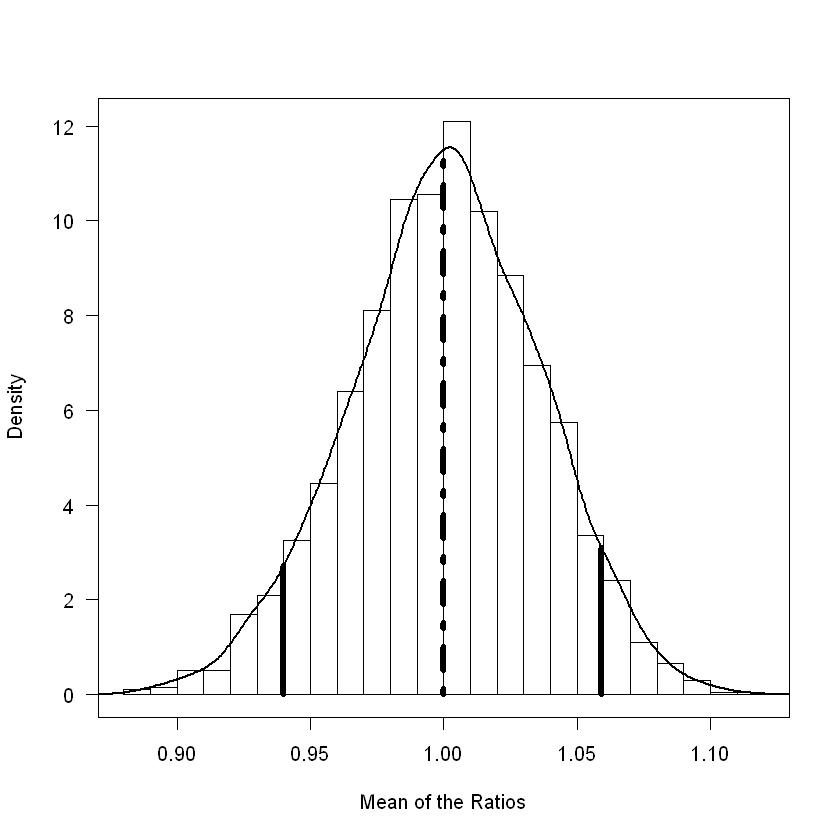

In [72]:
# For Figure 10.6
hist(boota,nclass=30, freq=F,las=1,
xlab="Mean of the Ratios", ylab="Density", main="")
box()
den = density(boota); lines(den, lwd=2)
qya = approx(den$x, den$y, c(qxa,rbar))$y
segments(qxa[1],0,qxa[1],qya[1], lwd=5)
segments(qxa[2],0,qxa[2],qya[2], lwd=5)
segments(rbar,0,rbar,qya[3],lty=4, lwd=5)

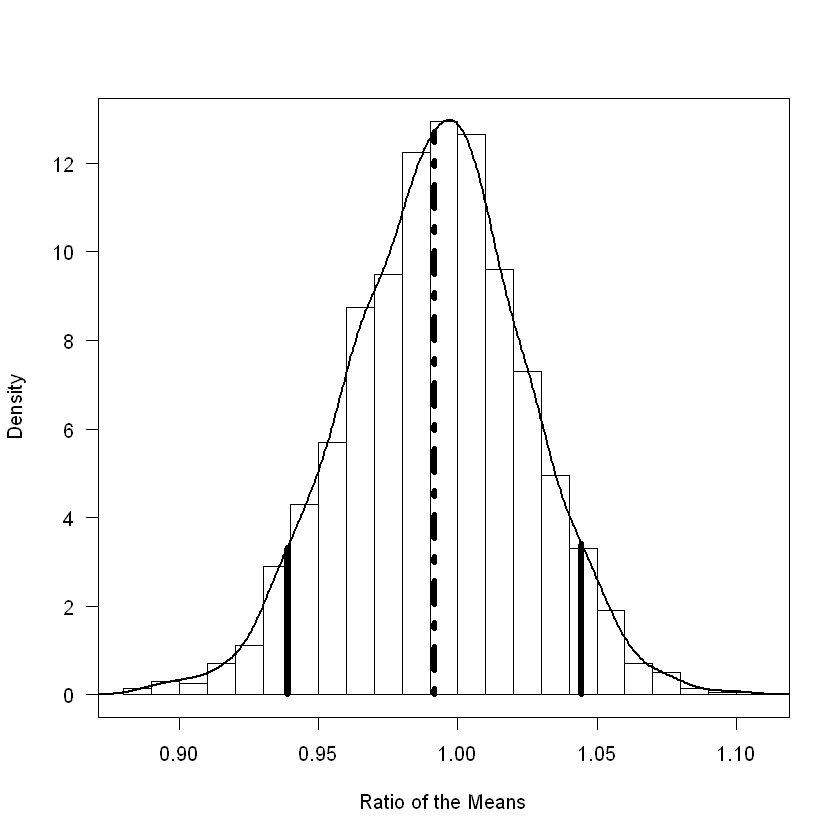

In [73]:
# For Figure 10.7
hist(bootb,nclass=30, freq=F,las=1,
xlab="Ratio of the Means", ylab="Density", main="")
box()
den = density(bootb)
lines(den, lwd=2)
rmean = mean(dRT$AUC4T)/mean(dRT$AUC4R)
qyb = approx(den$x, den$y, c(qxb,rmean))$y
segments(qxb[1],0,qxb[1],qyb[1], lwd=5)
segments(qxb[2],0,qxb[2],qyb[2], lwd=5)
segments(rmean,0,rmean,qyb[3],lty=4, lwd=5)